In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


## **IMPORT LIBRARIES**

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **LOAD DATASET**

In [3]:

df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

## **DATA EXPLORATION**

In [4]:
# Basic Information

from IPython.display import display, HTML

# Display DataFrame in a scrollable div
def display_scrollable_dataframe(df, height=300):
    display(HTML(f"""
        <div style="height:{height}px; overflow:auto;">
            {df.to_html(classes='table table-bordered table-striped')}
        </div>
    """))

# Display the DataFrame
display_scrollable_dataframe(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [5]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [6]:
df.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Check for Missing Values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Fill Nan Values with 0

df.Age = df.Age.fillna(0)
df.Cabin = df.Cabin.fillna(0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
# Imputation for missing Age values

from sklearn.impute import KNNImputer

# KNN imputer to fill missing values based on similar rows
imputer = KNNImputer(n_neighbors=5)
df.Age = imputer.fit_transform(df[['Age']])

In [11]:
# Display Data

from IPython.display import display, HTML

# Display DataFrame in a scrollable div
def display_scrollable_dataframe(df, height=300):
    display(HTML(f"""
        <div style="height:{height}px; overflow:auto;">
            {df.to_html(classes='table table-bordered table-striped')}
        </div>
    """))

# Display the DataFrame
display_scrollable_dataframe(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.00,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,0,C


## **UNIVARIATE ANALYSIS**

In [12]:
# Univariate for Age

# Central Tendency
mean_age = df['Age'].mean()  # Mean
median_age = df['Age'].median()  # Median
mode_age = df['Age'].mode()[0]  # Mode (get the first mode value)

# Dispersion
std_dev_age = df['Age'].std()  # Standard Deviation
variance_age = df['Age'].var()  # Variance
range_age = df['Age'].max() - df['Age'].min()  # Range
iqr_age = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)  # Interquartile Range (IQR)

# Print Results
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")
print(f"Standard Deviation of Age: {std_dev_age}")
print(f"Variance of Age: {variance_age}")
print(f"Range of Age: {range_age}")
print(f"Interquartile Range (IQR) of Age: {iqr_age}")

Mean Age: 23.79929292929293
Median Age: 24.0
Mode Age: 0.0
Standard Deviation of Age: 17.596074065915875
Variance of Age: 309.6218225331972
Range of Age: 80.0
Interquartile Range (IQR) of Age: 29.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


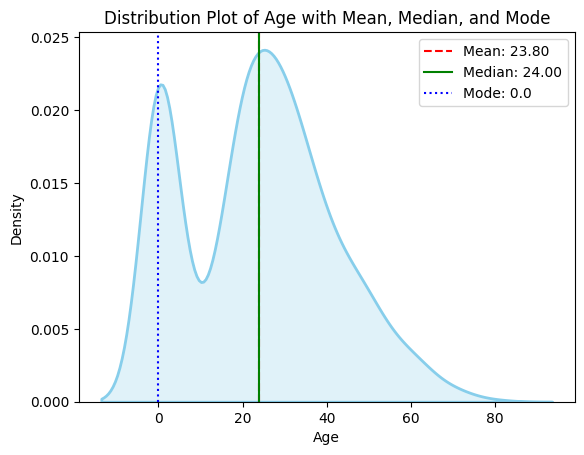

In [13]:
# Age Distribution

sns.kdeplot(df['Age'], fill=True, color='skyblue', linewidth=2)

# Vertical lines for mean, median, and mode
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', label=f'Median: {median_age:.2f}')
plt.axvline(mode_age, color='blue', linestyle=':', label=f'Mode: {mode_age}')

# Title and labels
plt.title('Distribution Plot of Age with Mean, Median, and Mode')
plt.xlabel('Age')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


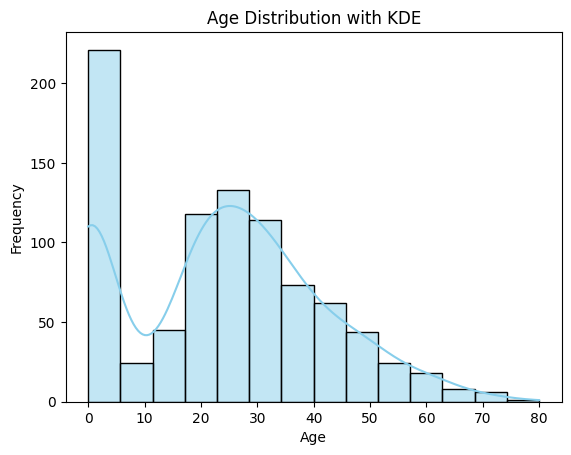

In [14]:
# Histogram

sns.histplot(df['Age'], kde=True, color='skyblue')

# Title and labels
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

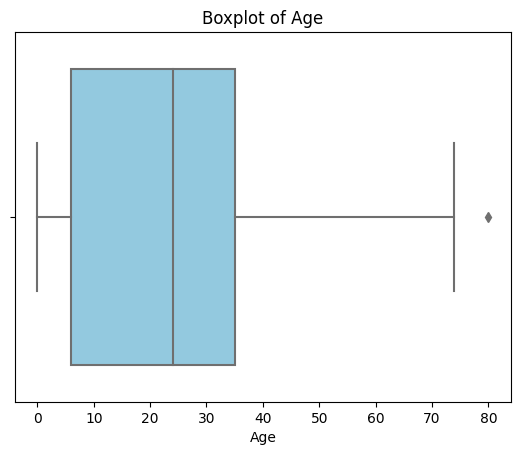

In [15]:
# Boxplot of Age

sns.boxplot(x=df['Age'], color='skyblue')

# Title and Labels
plt.title('Boxplot of Age')
plt.xlabel('Age')

# Show the plot
plt.show()

In [16]:
# Univariate for Fare

# Central Tendency 
mean_fare = df['Fare'].mean()  # Mean
median_fare = df['Fare'].median()  # Median
mode_fare = df['Fare'].mode()[0]  # Mode (get the first mode value)

# Dispersion
std_dev_fare = df['Fare'].std()  # Standard Deviation
variance_fare = df['Fare'].var()  # Variance
range_fare = df['Fare'].max() - df['Fare'].min()  # Range
iqr_fare = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)  # Interquartile Range (IQR)

# Print Results
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Mode Fare: {mode_fare}")
print(f"Standard Deviation of Fare: {std_dev_fare}")
print(f"Variance of Fare: {variance_fare}")
print(f"Range of Fare: {range_fare}")
print(f"Interquartile Range (IQR) of Fare: {iqr_fare}")

Mean Fare: 32.204207968574636
Median Fare: 14.4542
Mode Fare: 8.05
Standard Deviation of Fare: 49.6934285971809
Variance of Fare: 2469.436845743116
Range of Fare: 512.3292
Interquartile Range (IQR) of Fare: 23.0896


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


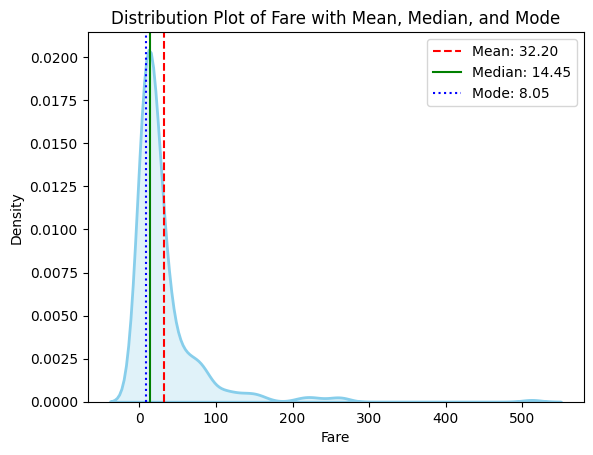

In [17]:
# Fare Distribution

sns.kdeplot(df['Fare'], fill=True, color='skyblue', linewidth=2)

# Vertical lines for mean, median, and mode
plt.axvline(mean_fare, color='red', linestyle='--', label=f'Mean: {mean_fare:.2f}')
plt.axvline(median_fare, color='green', linestyle='-', label=f'Median: {median_fare:.2f}')
plt.axvline(mode_fare, color='blue', linestyle=':', label=f'Mode: {mode_fare}')

# Title and labels
plt.title('Distribution Plot of Fare with Mean, Median, and Mode')
plt.xlabel('Fare')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


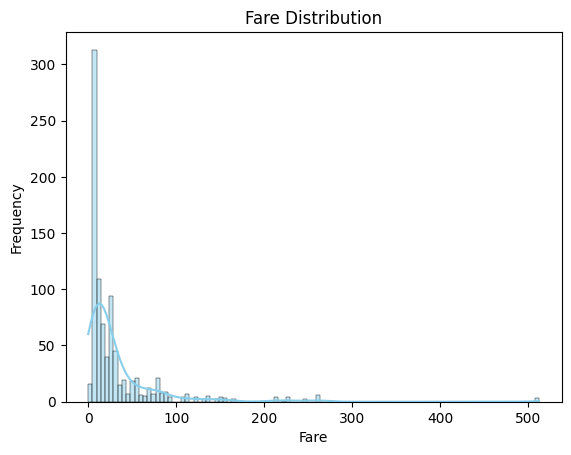

In [18]:
# Fare Distribution

sns.histplot(df['Fare'], kde=True, color='skyblue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.show()

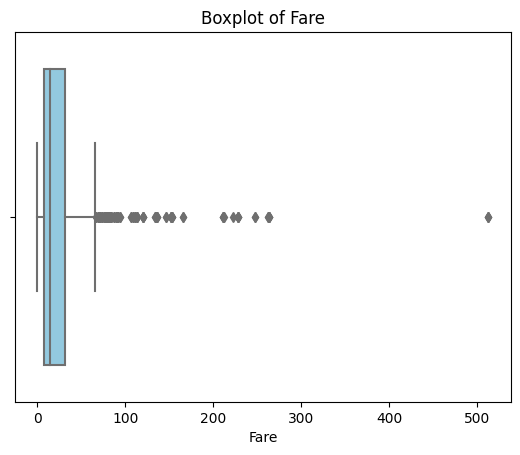

In [19]:
# Boxplot of Fare

sns.boxplot(x=df['Fare'], color='skyblue')

# Title and Labels
plt.title('Boxplot of Fare')
plt.xlabel('Fare')

# Show the plot
plt.show()

## **CATEGORICAL FEATURES**

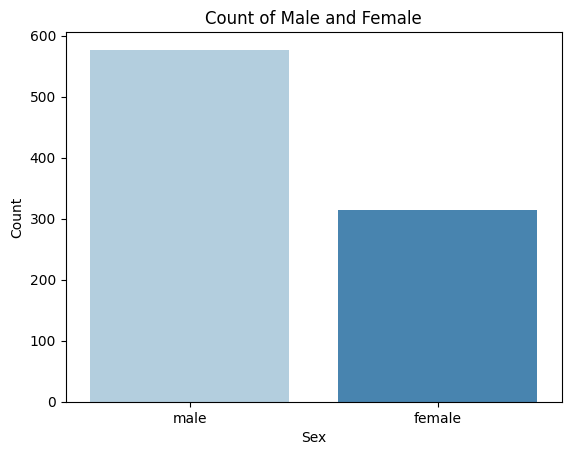

In [20]:
# Sex

sns.countplot(x='Sex', data=df, palette='Blues')

# Title and labels
plt.title('Count of Male and Female')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()

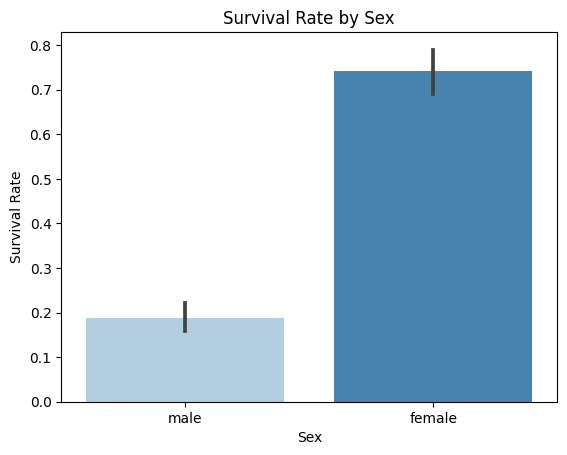

In [21]:
# Barplot of Survival rate
sns.barplot(x='Sex', y='Survived', data=df, palette='Blues')

# Labels and title
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()


## **BIVARIATE ANALYSIS**

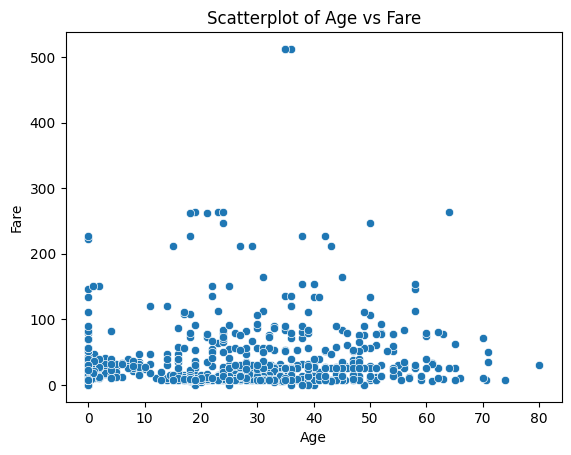

In [22]:
# Scatterplot of age vs fare

sns.scatterplot(x='Age', y='Fare', data=df)

# Labels and title
plt.title('Scatterplot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

# Show the plot
plt.show()

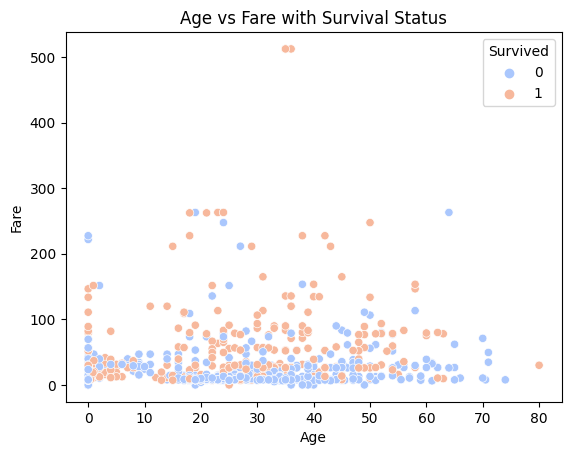

In [23]:
# Scatterplot with hue to color by survival status
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived', palette='coolwarm')

# Labels and title
plt.title('Age vs Fare with Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')

# Show the plot
plt.show()

# Note: 1 = Survived, 0 = Didn't Survived

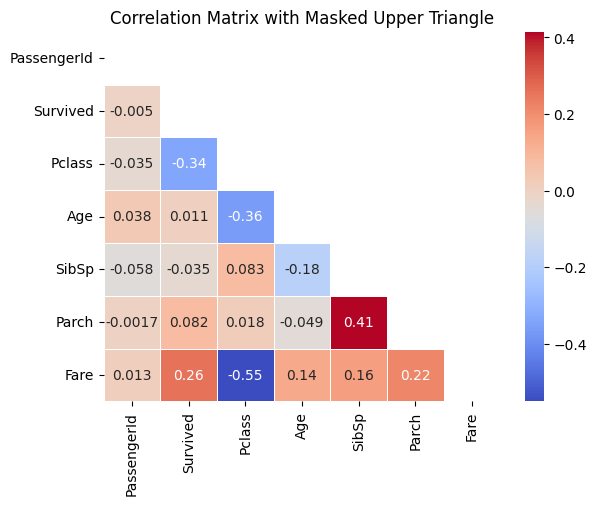

In [24]:
# Correlation Matrix

# Select both integer and float columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)

# Labels and title
plt.title('Correlation Matrix with Masked Upper Triangle')

# Show the plot
plt.show()


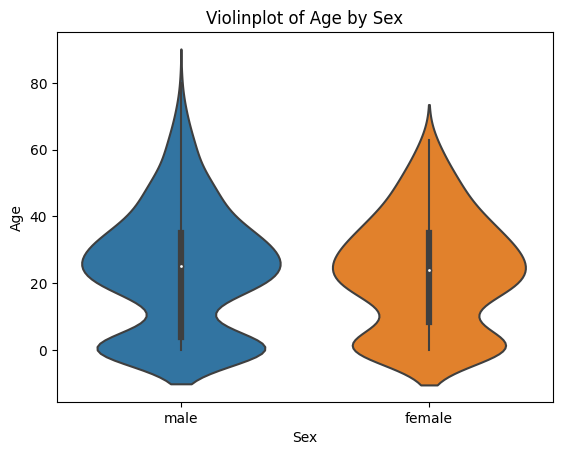

In [25]:
# Violinplot for Sex vs Age
sns.violinplot(x='Sex', y='Age', data=df)

# Labels and title
plt.title('Violinplot of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')

# Show the plot
plt.show()

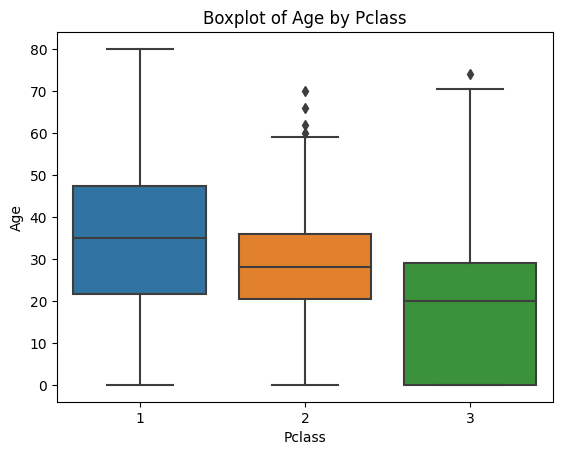

In [26]:
# Boxplot for Pclass vs Age
sns.boxplot(x='Pclass', y='Age', data=df)

# Labels and title
plt.title('Boxplot of Age by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')

# Show the plot
plt.show()

In [27]:
# Cross-tabulation (contingency table)
cross_tab = pd.crosstab(df['Sex'], df['Pclass'])

# Print the cross-tab to see the frequencies
print(cross_tab)

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347


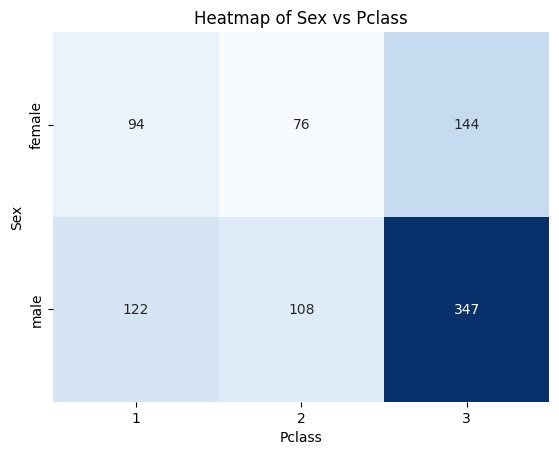

In [28]:
# Visualize the Cross-Tab with a Heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add labels and title
plt.title('Heatmap of Sex vs Pclass')
plt.xlabel('Pclass')
plt.ylabel('Sex')

# Show the plot
plt.show()


## **FEATURE ENGINEERING**

In [29]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [30]:
# Create 'FamilySize' feature: SibSp + Parch + 1 (for the passenger themselves)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create 'IsAlone' feature: 1 if family size is 1, else 0
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Show the new DataFrame with created features
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,1,1


* FamilySize is calculated by adding the SibSp (number of siblings/spouses) and Parch (number of parents/children) columns, plus 1 for the passenger themselves.
* IsAlone is a binary feature that is 1 if the passenger is traveling alone (i.e., FamilySize == 1), otherwise, it is 0.

## **ENCODING CATEGORICAL FEATURES**

In [31]:
# Perform One-Hot Encoding using pandas.get_dummies

# One Hot Encoding
df_oh = pd.get_dummies(df, columns=['Sex'], drop_first=False)
df_oh.head(4)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,S,2,0,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,2,0,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,1,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,2,0,True,False


* Sex_female and Sex_male are now binary columns, where the values are 1 if the passenger is female or male, respectively, and 0 otherwise.
* drop_first=False keeps both columns for each category (male and female). If drop_first=True, one of the columns would be dropped to avoid multicollinearity.

In [32]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

# Label encode the 'Sex' column
label_encoder = LabelEncoder()
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])

print(df[['Sex', 'Sex_encoded']])

        Sex  Sex_encoded
0      male            1
1    female            0
2    female            0
3    female            0
4      male            1
..      ...          ...
886    male            1
887  female            0
888  female            0
889    male            1
890    male            1

[891 rows x 2 columns]


* Sex_encoded is a numerical encoding where 0 represents female and 1 represents male. This is useful when the algorithm requires numerical inputs (e.g., logistic regression, decision trees, etc.).

In [33]:
df_oh.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex_female', 'Sex_male'], inplace=True)

## **MACHINE LEARNING CLASSIFICATION MODEL**

In [34]:
# Split the data into features (X) and target variable (y)
X = df_oh.drop('Survived', axis=1)
y = df_oh['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

# Make predictions
y_pred = model.predict(X_test_scaled)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5725 - loss: 0.6843 - val_accuracy: 0.6872 - val_loss: 0.6165
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6644 - loss: 0.6162 - val_accuracy: 0.7095 - val_loss: 0.5827
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6667 - loss: 0.6141 - val_accuracy: 0.7263 - val_loss: 0.5661
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6980 - loss: 0.5778 - val_accuracy: 0.7374 - val_loss: 0.5554
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7038 - loss: 0.5835 - val_accuracy: 0.7430 - val_loss: 0.5505
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6905 - loss: 0.5859 - val_accuracy: 0.7486 - val_loss: 0.5465
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6931 - loss: 0.5851 - val_accuracy: 0.7486 - val_loss: 0.5404
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7244 - loss: 0.5772 - val_accuracy: 0.7542 - val_loss: 0.5379
Ep

## **CONFUSION MATRIX**

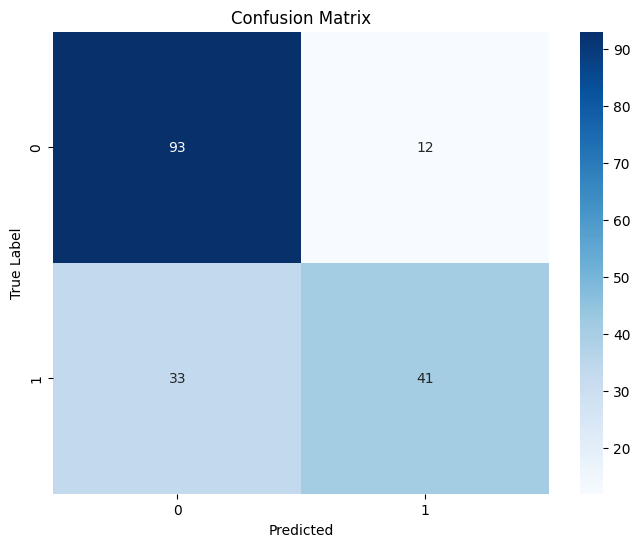

In [35]:
from sklearn.metrics import confusion_matrix

# y_pred contains probabilities, convert them to class labels by applying a threshold (0.5 for binary classification)
y_pred_class = (y_pred >= 0.5).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test.astype(int), y_pred_class)

# Plot the confusion matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **ROC Curve and AUC-ROC Score**

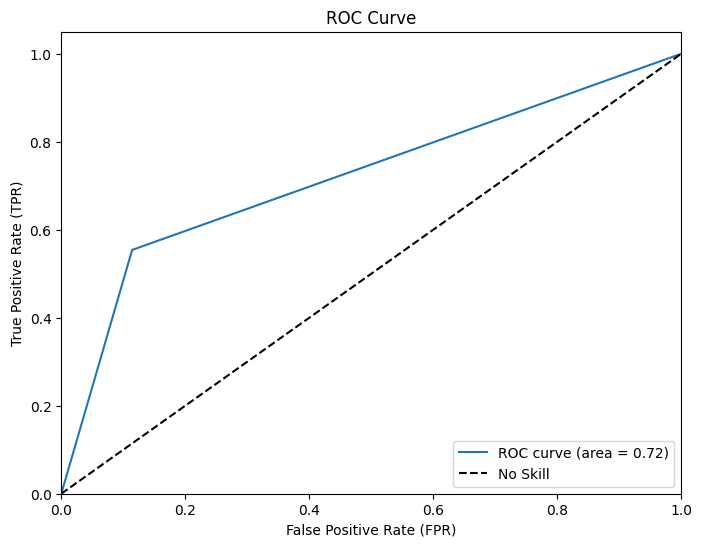

In [36]:
from sklearn.metrics import roc_curve, auc

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred_class)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds. The Area Under the ROC Curve (AUC-ROC) score summarizes the model's performance, with a higher value indicating better performance.

## **DISTRIBUTION OF PREDICTIONS**

/tmp/ipykernel_17/1824114229.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived_pred, label='Survived')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_17/1824114229.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for hist

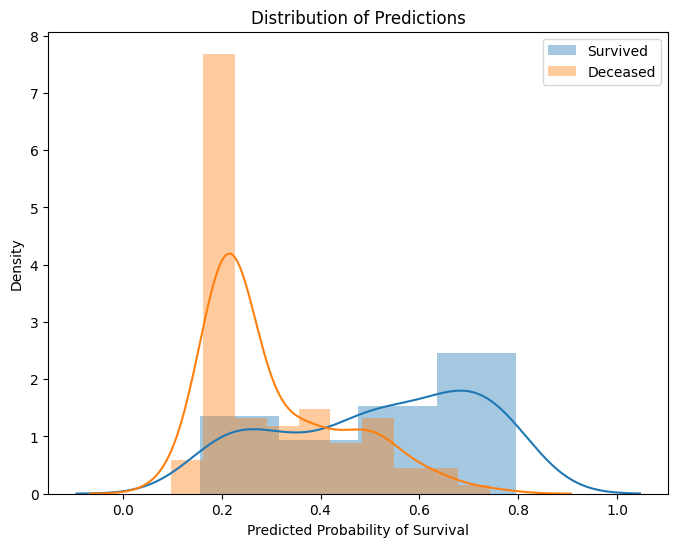

In [37]:
# Separate predictions for survived and deceased classes
survived_pred = y_pred[y_test == 1]
deceased_pred = y_pred[y_test == 0]

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.distplot(survived_pred, label='Survived')
sns.distplot(deceased_pred, label='Deceased')
plt.xlabel('Predicted Probability of Survival')
plt.ylabel('Density')
plt.title('Distribution of Predictions')
plt.legend()
plt.show()

Visualize the distribution of your model's predictions for both survived and deceased classes. This can reveal potential biases or issues with the model's calibration.